### Aufgabe:
Wende die Clustering-Verfahren K-Means und DBSCAN auf die bereitgestellten Punktmengen an.
Visualisiere die Ergebnisse und vergleiche, welches Verfahren besser für welche Punktmenge geeignet ist.

### Schritte:
1. Wende K-Means auf die Punktmengen an und visualisiere die Ergebnisse.
2. Wende DBSCAN auf die Punktmengen an und visualisiere die Ergebnisse.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN


X1, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)  
X2, _ = make_moons(n_samples=300, noise=0.05, random_state=42)  # Halbmonde
X3, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)  
X4, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.2, random_state=42)  
X5, _ = make_moons(n_samples=300, noise=0.15, random_state=42)  
X6, _ = make_circles(n_samples=300, factor=0.4, noise=0.1, random_state=42)  

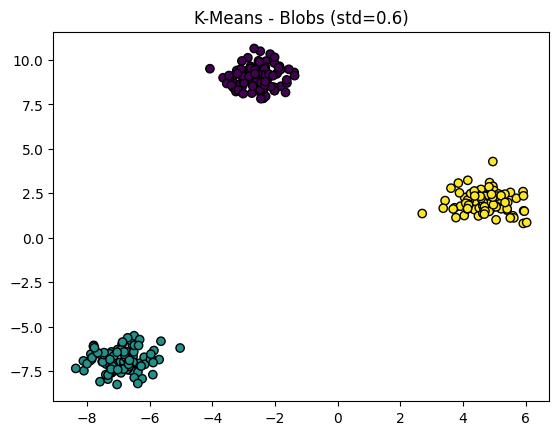

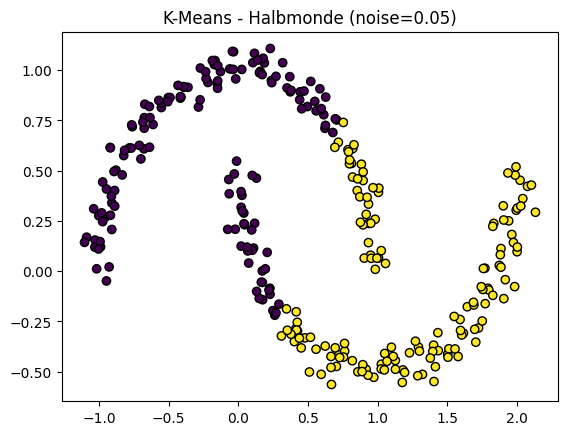

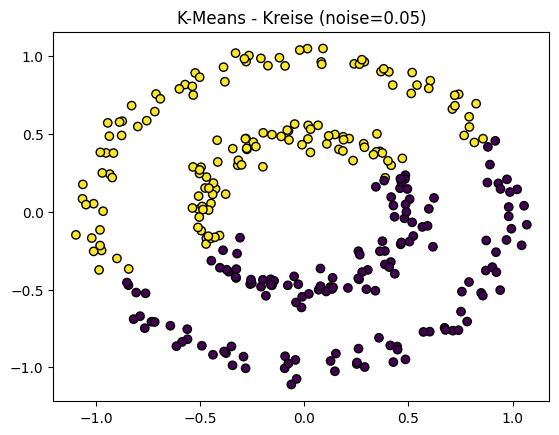

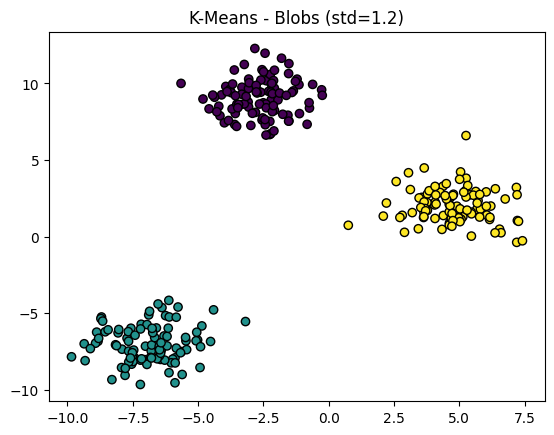

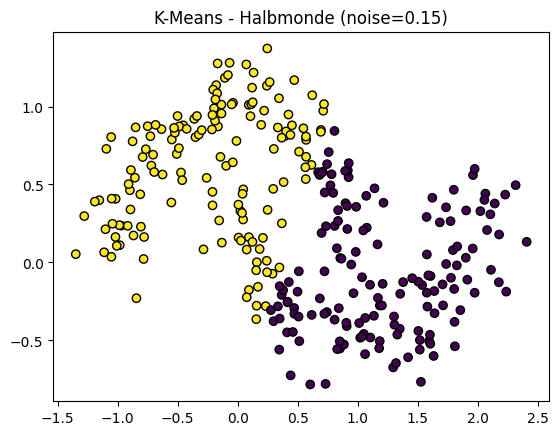

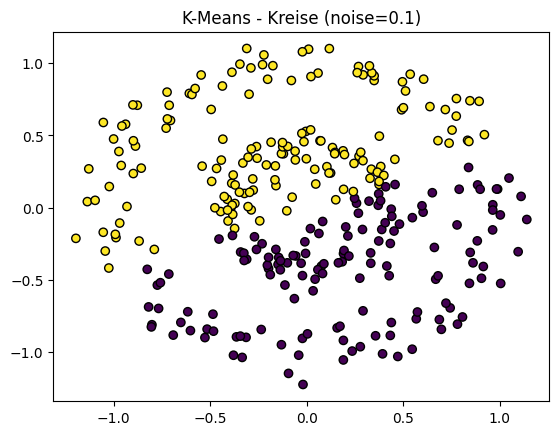

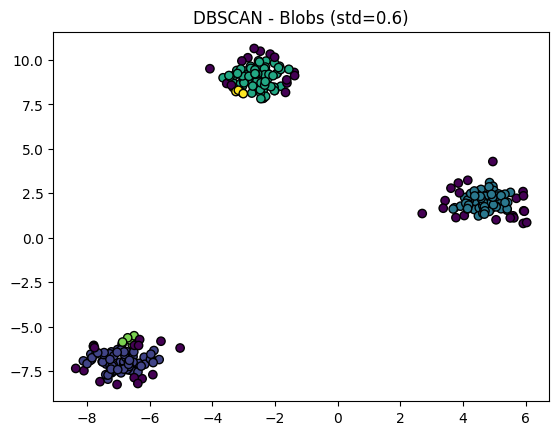

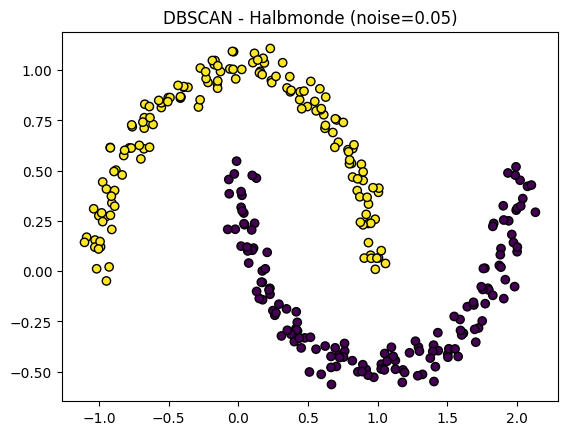

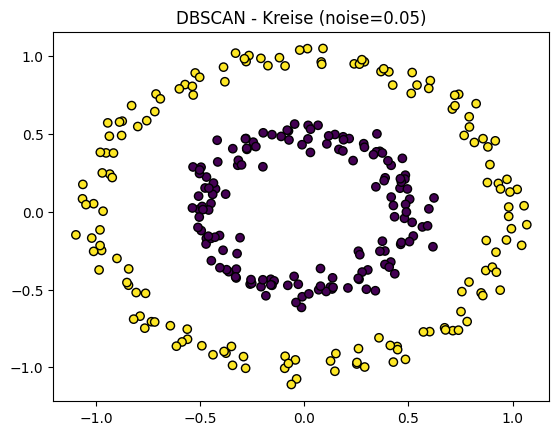

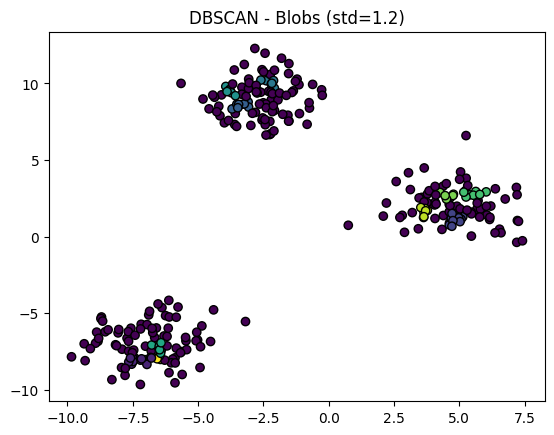

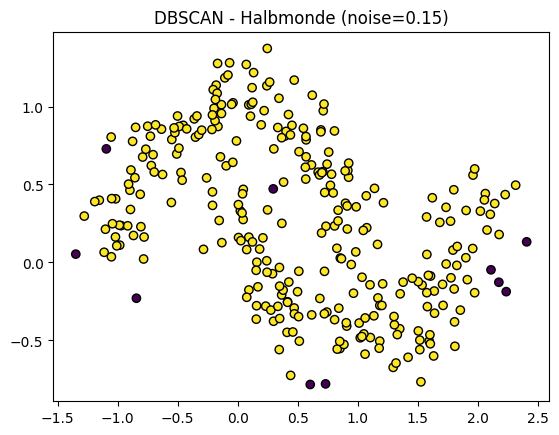

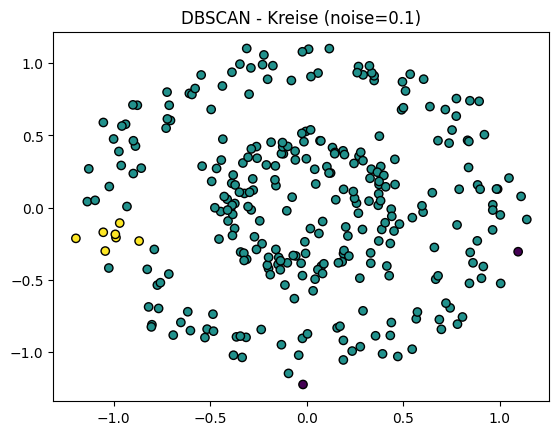

In [2]:
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.title(title)
    plt.show()

datasets = [(X1, 'Blobs (std=0.6)'), (X2, 'Halbmonde (noise=0.05)'), 
            (X3, 'Kreise (noise=0.05)'), (X4, 'Blobs (std=1.2)'), 
            (X5, 'Halbmonde (noise=0.15)'), (X6, 'Kreise (noise=0.1)')]

for X, title in datasets:
    n_clusters = 3 if 'Blobs' in title else 2
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    plot_clusters(X, labels, f'K-Means - {title}')

for X, title in datasets:
    eps = 0.3 if 'Blobs' in title else 0.2  # Anpassung des Epsilon-Werts
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    plot_clusters(X, labels, f'DBSCAN - {title}')

***K-Means:*** 
Funktioniert gut für kugelförmige Cluster (z. B. X1, X4), hat jedoch Probleme mit nicht-konvexen Strukturen (X2, X3, X5, X6).   

***DBSCAN:*** 
Eignet sich gut für nicht-konvexe Strukturen wie Halbmonde und konzentrische Kreise (X2, X3, X5, X6), kann aber bei stark überlappenden Clustern (X1, X4) Schwierigkeiten haben.